# Homework Starter — Stage 6: Data Preprocessing
Use this notebook to apply your cleaning functions and save processed data.

In [1]:
import pandas as pd
import pandas as pd
import sys
import os

# Get the correct paths
current_dir = os.getcwd()
print(f"Current directory: {current_dir}")

bootcamp_root = os.path.dirname(current_dir) 
print(f"Bootcamp root: {bootcamp_root}")

# Add bootcamp root to Python path to import src.cleaning
if bootcamp_root not in sys.path:
    sys.path.append(bootcamp_root)

# Add src directory specifically
src_path = os.path.join(bootcamp_root, 'src')
if src_path not in sys.path:
    sys.path.append(src_path)

from src import cleaning

Current directory: /Users/alanwang/Downloads/bootcamp_alan_wang/notebooks
Bootcamp root: /Users/alanwang/Downloads/bootcamp_alan_wang


## Load Raw Dataset

In [2]:
df = pd.read_csv('../data/raw/sample_20250816-200326.csv')
df.head()

print("Original dataset shape:", df.shape)
print("\nMissing values per column:")
print(df.isnull().sum())
print("\nData types:")
print(df.dtypes)

# Store original for comparison
original_df = df.copy()

Original dataset shape: (20, 3)

Missing values per column:
date      0
ticker    0
price     0
dtype: int64

Data types:
date       object
ticker     object
price     float64
dtype: object


## Apply Cleaning Functions

Dropped columns with >50.0% missing values: []

Numeric columns for median imputation: ['price']

Columns to normalize: ['price']
Normalized column 'price':
  Original - Mean: 149.24, Std: 1.62
  Normalized - Mean: 0.00, Std: 1.03

Final missing values after cleaning:
date      0
ticker    0
price     0
dtype: int64

=== COMPARISON: ORIGINAL vs CLEANED DATA ===
Original shape: (20, 3)
Cleaned shape: (20, 3)

Original numeric columns statistics:
        price
count   20.00
mean   149.24
std      1.62
min    146.82
25%    148.13
50%    149.05
75%    149.96
max    152.39

Cleaned numeric columns statistics:
       price
count  20.00
mean    0.00
std     1.03
min    -1.54
25%    -0.70
50%    -0.12
75%     0.46
max     1.99


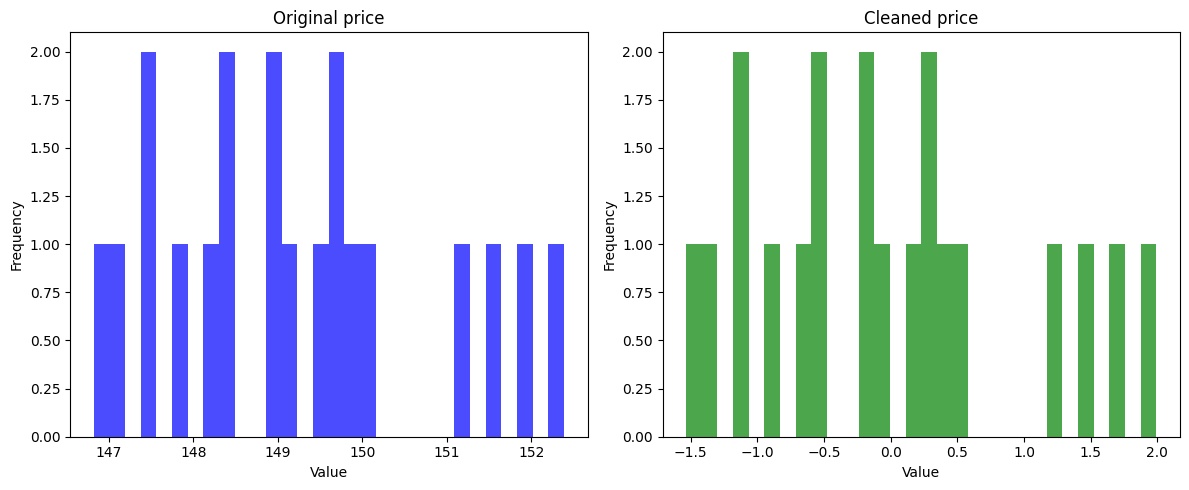

In [3]:
# TODO: Apply your functions here
# Example:
# df = cleaning.fill_missing_median(df, ['col1','col2'])
# df = cleaning.drop_missing(df, threshold=0.5)
# df = cleaning.normalize_data(df, ['col1','col2'])

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Drop columns with more than 50% missing values
df = cleaning.drop_missing(df, threshold=0.5)

# Step 2: Identify numeric columns for median imputation
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"\nNumeric columns for median imputation: {numeric_cols}")

# Fill missing values in numeric columns with median
df = cleaning.fill_missing_median(df, numeric_cols)

# Step 3: Normalize numeric columns (excluding any binary/categorical numeric)
# For this example, we'll normalize all numeric columns, but you might want to exclude some
normalize_cols = [col for col in numeric_cols if df[col].nunique() > 2]  # Exclude binary columns
print(f"\nColumns to normalize: {normalize_cols}")

df = cleaning.normalize_data(df, normalize_cols)

# Step 4: Handle categorical columns (simple mode imputation for this example)
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
for col in categorical_cols:
    if col in df.columns and df[col].isnull().sum() > 0:
        mode_val = df[col].mode()[0]
        df[col] = df[col].fillna(mode_val)
        print(f"Filled categorical column '{col}' with mode: {mode_val}")

print(f"\nFinal missing values after cleaning:")
print(df.isnull().sum())

## Compare original vs cleaned data
print("\n=== COMPARISON: ORIGINAL vs CLEANED DATA ===")
print(f"Original shape: {original_df.shape}")
print(f"Cleaned shape: {df.shape}")

# Compare basic statistics
print("\nOriginal numeric columns statistics:")
print(original_df.select_dtypes(include=[np.number]).describe().round(2))

print("\nCleaned numeric columns statistics:")
print(df.select_dtypes(include=[np.number]).describe().round(2))

# Visual comparison for a sample numeric column (if available)
if len(numeric_cols) > 0:
    sample_col = numeric_cols[0]
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # Original data
    ax1.hist(original_df[sample_col].dropna(), bins=30, alpha=0.7, color='blue')
    ax1.set_title(f'Original {sample_col}')
    ax1.set_xlabel('Value')
    ax1.set_ylabel('Frequency')
    
    # Cleaned data
    ax2.hist(df[sample_col], bins=30, alpha=0.7, color='green')
    ax2.set_title(f'Cleaned {sample_col}')
    ax2.set_xlabel('Value')
    ax2.set_ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

In [4]:
## Document Assumptions
print("\n=== ASSUMPTIONS ===")
print("1. Columns with >50% missing values are dropped as they may not provide meaningful information")
print("2. Missing values in numeric columns are filled with median (robust to outliers)")
print("3. Numeric columns are normalized using z-score standardization (mean=0, std=1)")
print("4. Binary numeric columns are excluded from normalization")
print("5. Categorical missing values are filled with mode (most frequent value)")
print("6. All transformations are applied in a specific order: drop columns → fill numeric → normalize → fill categorical")


=== ASSUMPTIONS ===
1. Columns with >50% missing values are dropped as they may not provide meaningful information
2. Missing values in numeric columns are filled with median (robust to outliers)
3. Numeric columns are normalized using z-score standardization (mean=0, std=1)
4. Binary numeric columns are excluded from normalization
5. Categorical missing values are filled with mode (most frequent value)
6. All transformations are applied in a specific order: drop columns → fill numeric → normalize → fill categorical


## Save Cleaned Dataset

In [5]:
df.to_csv('../data/processed/sample_data_cleaned.csv', index=False)
print(f"\nCleaned dataset saved to ../data/processed/sample_data_cleaned.csv")


Cleaned dataset saved to ../data/processed/sample_data_cleaned.csv
